In [59]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y=None):
    if x == 0:  # шоб на ноль не делить решил сделать так
        x = 0.01
    return 1 / (2 * np.sqrt(x))


x0, y0 = 1, 3  # начальные условия
steps = [10, 20, 30]

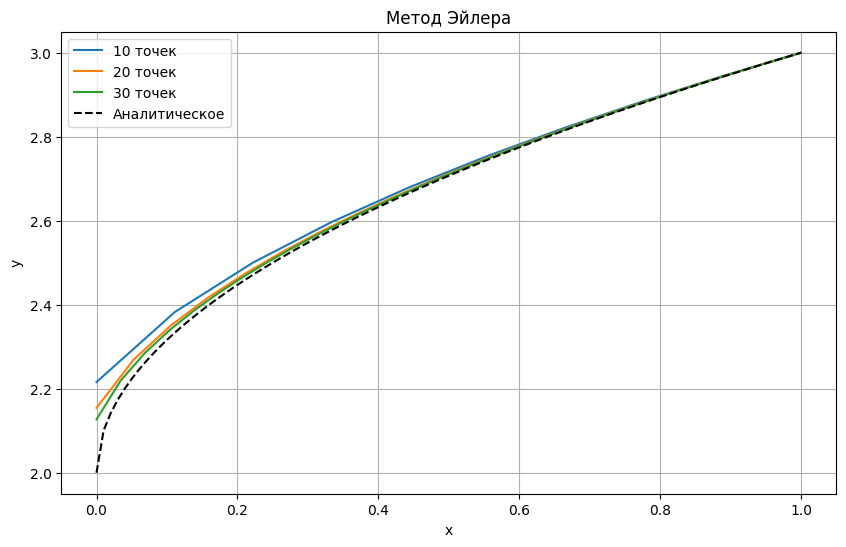

In [60]:
def euler_method(f, x0, y0, n):
    h = 1 / (n - 1)
    x = np.linspace(x0, 0, n)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i] - h * f(x[i], y[i])  # тк обратное движение, вычитаем
    return x, y


plt.figure(figsize=(10, 6))

for n in steps:
    x, y = euler_method(f, x0, y0, n)
    plt.plot(x, y, label=f'{n} точек')

x_true = np.linspace(0, 1, 100)
y_true = np.sqrt(x_true) + 2
plt.plot(x_true, y_true, 'k--', label='Аналитическое')

plt.title('Метод Эйлера')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


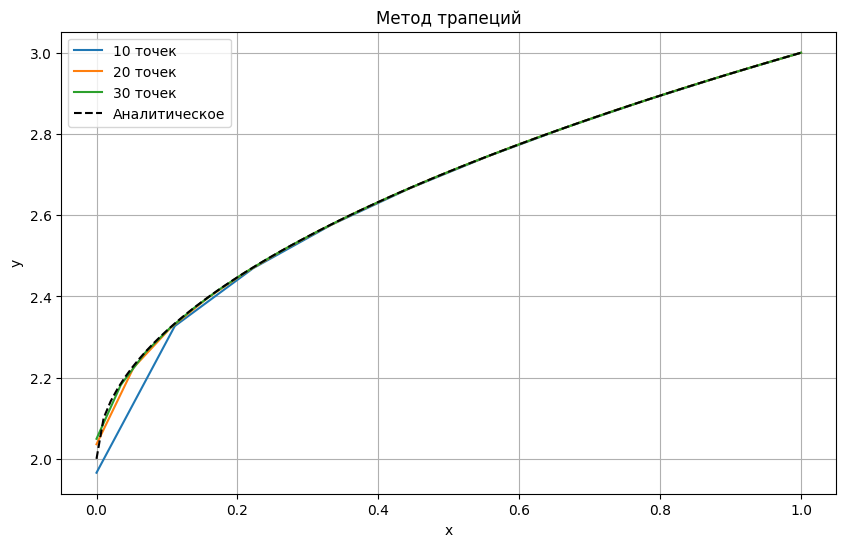

In [61]:

def trapezoidal_method(f, x0, y0, n):
    h = 1 / (n - 1)
    x = np.linspace(x0, 0, n)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] - h / 2 * (f(x[i], y[i]) + f(x[i+1]))
    return x, y


plt.figure(figsize=(10, 6))


for n in steps:
    x, y = trapezoidal_method(f, x0, y0, n)
    plt.plot(x, y, label=f'{n} точек')


plt.plot(x_true, y_true, 'k--', label='Аналитическое')

plt.title('Метод трапеций')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


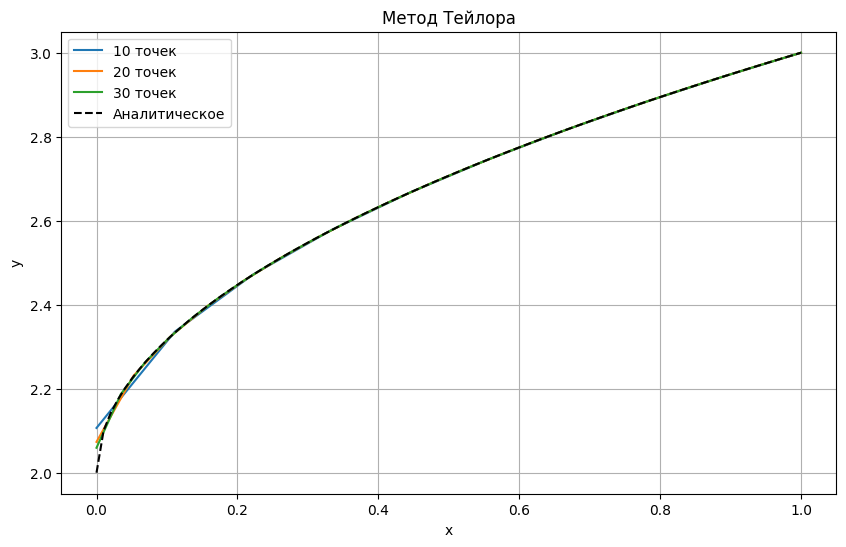

In [62]:
def df(x):
    if x == 0:
        x = 0.01
    return -1 / (4 * x ** (3 / 2))

def d2f(x):
    if x == 0:
        x = 0.01
    return 3 / (8 * x ** (5 / 2))


def taylor_method(f, df, d2f, x0, y0, n):
    h = 1 / (n - 1)
    x = np.linspace(x0, 0, n)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        f_i = f(x[i])
        df_i = df(x[i])
        d2f_i = d2f(x[i])
        y[i+1] = y[i] - h * f_i + (h ** 2) / 2  * df_i - (h ** 3) / 6 * d2f_i 
    return x, y


plt.figure(figsize=(10, 6))


for n in steps:
    x, y = taylor_method(f, df, d2f, x0, y0, n)
    plt.plot(x, y, label=f'{n} точек')


plt.plot(x_true, y_true, 'k--', label='Аналитическое')

plt.title('Метод Тейлора')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


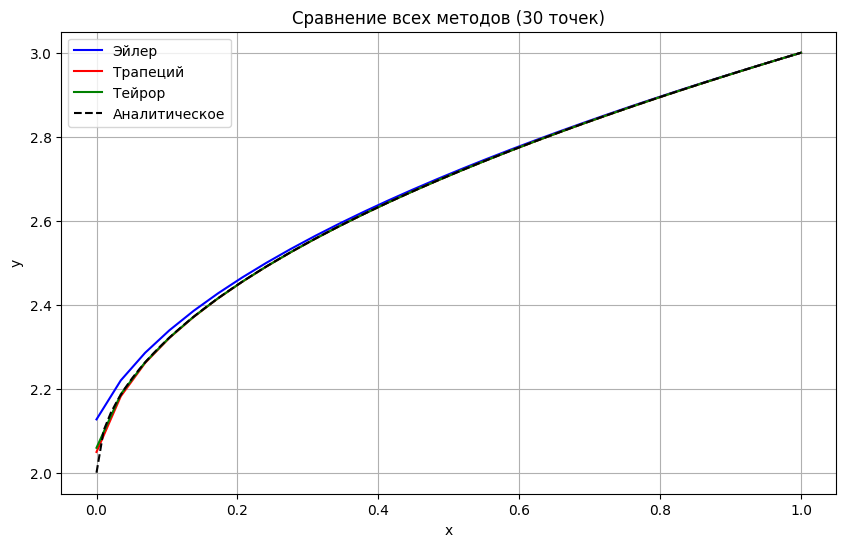

In [63]:
n = 30

x_euler, y_euler = euler_method(f, x0, y0, n)
x_trap, y_trap = trapezoidal_method(f, x0, y0, n)
x_taylor, y_taylor = taylor_method(f, df, d2f, x0, y0, n)

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, 'b-', label='Эйлер')
plt.plot(x_trap, y_trap, 'r-', label='Трапеций')
plt.plot(x_taylor, y_taylor, 'g-', label='Тейрор')
plt.plot(x_true, y_true, 'k--', label='Аналитическое')

plt.title('Сравнение всех методов (30 точек)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


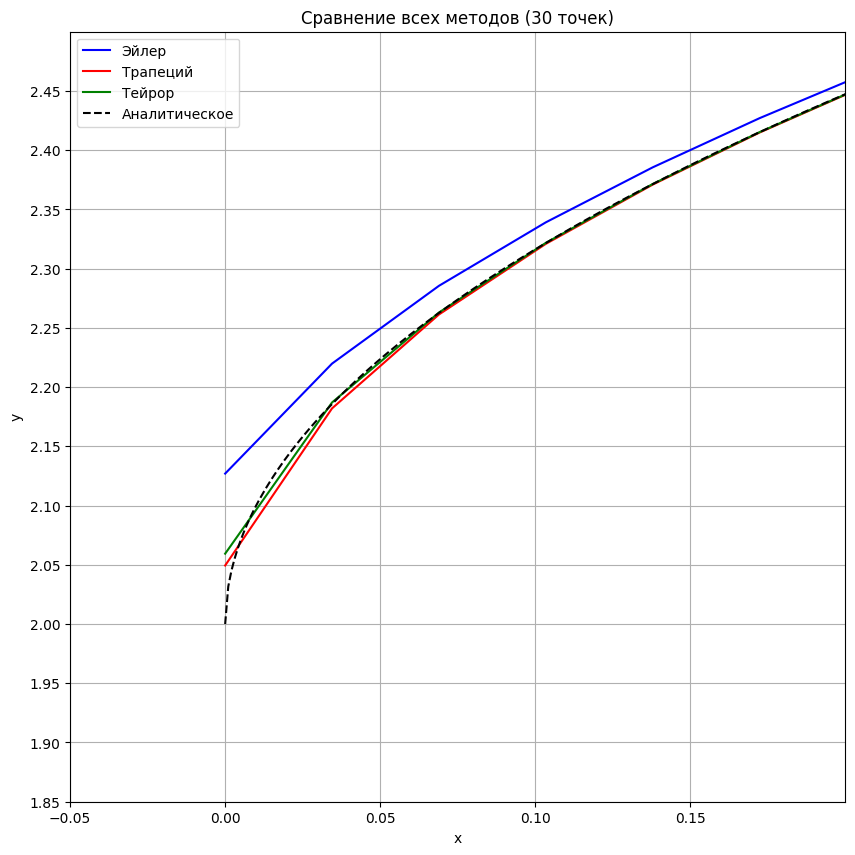

In [58]:
n = 30

x_euler, y_euler = euler_method(f, x0, y0, n)
x_trap, y_trap = trapezoidal_method(f, x0, y0, n)
x_taylor, y_taylor = taylor_method(f, df, d2f, x0, y0, n)

plt.figure(figsize=(10, 10))
plt.plot(x_euler, y_euler, 'b-', label='Эйлер')
plt.plot(x_trap, y_trap, 'r-', label='Трапеций')
plt.plot(x_taylor, y_taylor, 'g-', label='Тейрор')
plt.plot(x_true, y_true, 'k--', label='Аналитическое')

plt.title('Сравнение всех методов (30 точек)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.xlim([-0.05, 0.2])
plt.ylim([1.85, 2.5])
plt.xticks(np.arange(-0.05, 0.2, 0.05))
plt.yticks(np.arange(1.85, 2.5, 0.05))

plt.show()
